# ECS 배송 데이터 탐색적 분석 (EDA)

이 노트북은 이커머스 배송 정시 도착 여부(`Reached.on.Time_Y.N`)를 예측하기 전, 데이터의 특성을 파악하고 시각화하여 주요 인사이트를 도출하기 위한 목적입니다.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv('./data/Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [42]:
df.shape

(10999, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [19]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [48]:
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

#### 컬럼별 설명

| 컬럼명 | 설명 |
| :--- | :--- |
| **ID** | 고객 ID |
| **Warehouse block** | 창고 구역 (A, B, C, D, E로 구분) |
| **Mode of shipment** | 배송 수단 (Ship, Flight, Road) |
| **Customer care calls** | 배송 관련 문의 전화 횟수 |
| **Customer rating** | 고객 평점 (1: 최하, 5: 최고) |
| **Cost of the product** | 제품 가격 (US 달러 단위) |
| **Prior purchases** | 이전 구매 횟수 |
| **Product importance** | 제품 중요도 (low, medium, high) |
| **Gender** | 성별 (남성, 여성) |
| **Discount offered** | 해당 제품에 제공된 할인율 |
| **Weight in gms** | 제품 무게 (그램 단위) |
| **Reached on time** | 정시 도착 여부 (타겟 변수 - 1: 지연됨, 0: 정시 도착) |

## 0. 결측치(Null), 이상치(Outlier) 체크

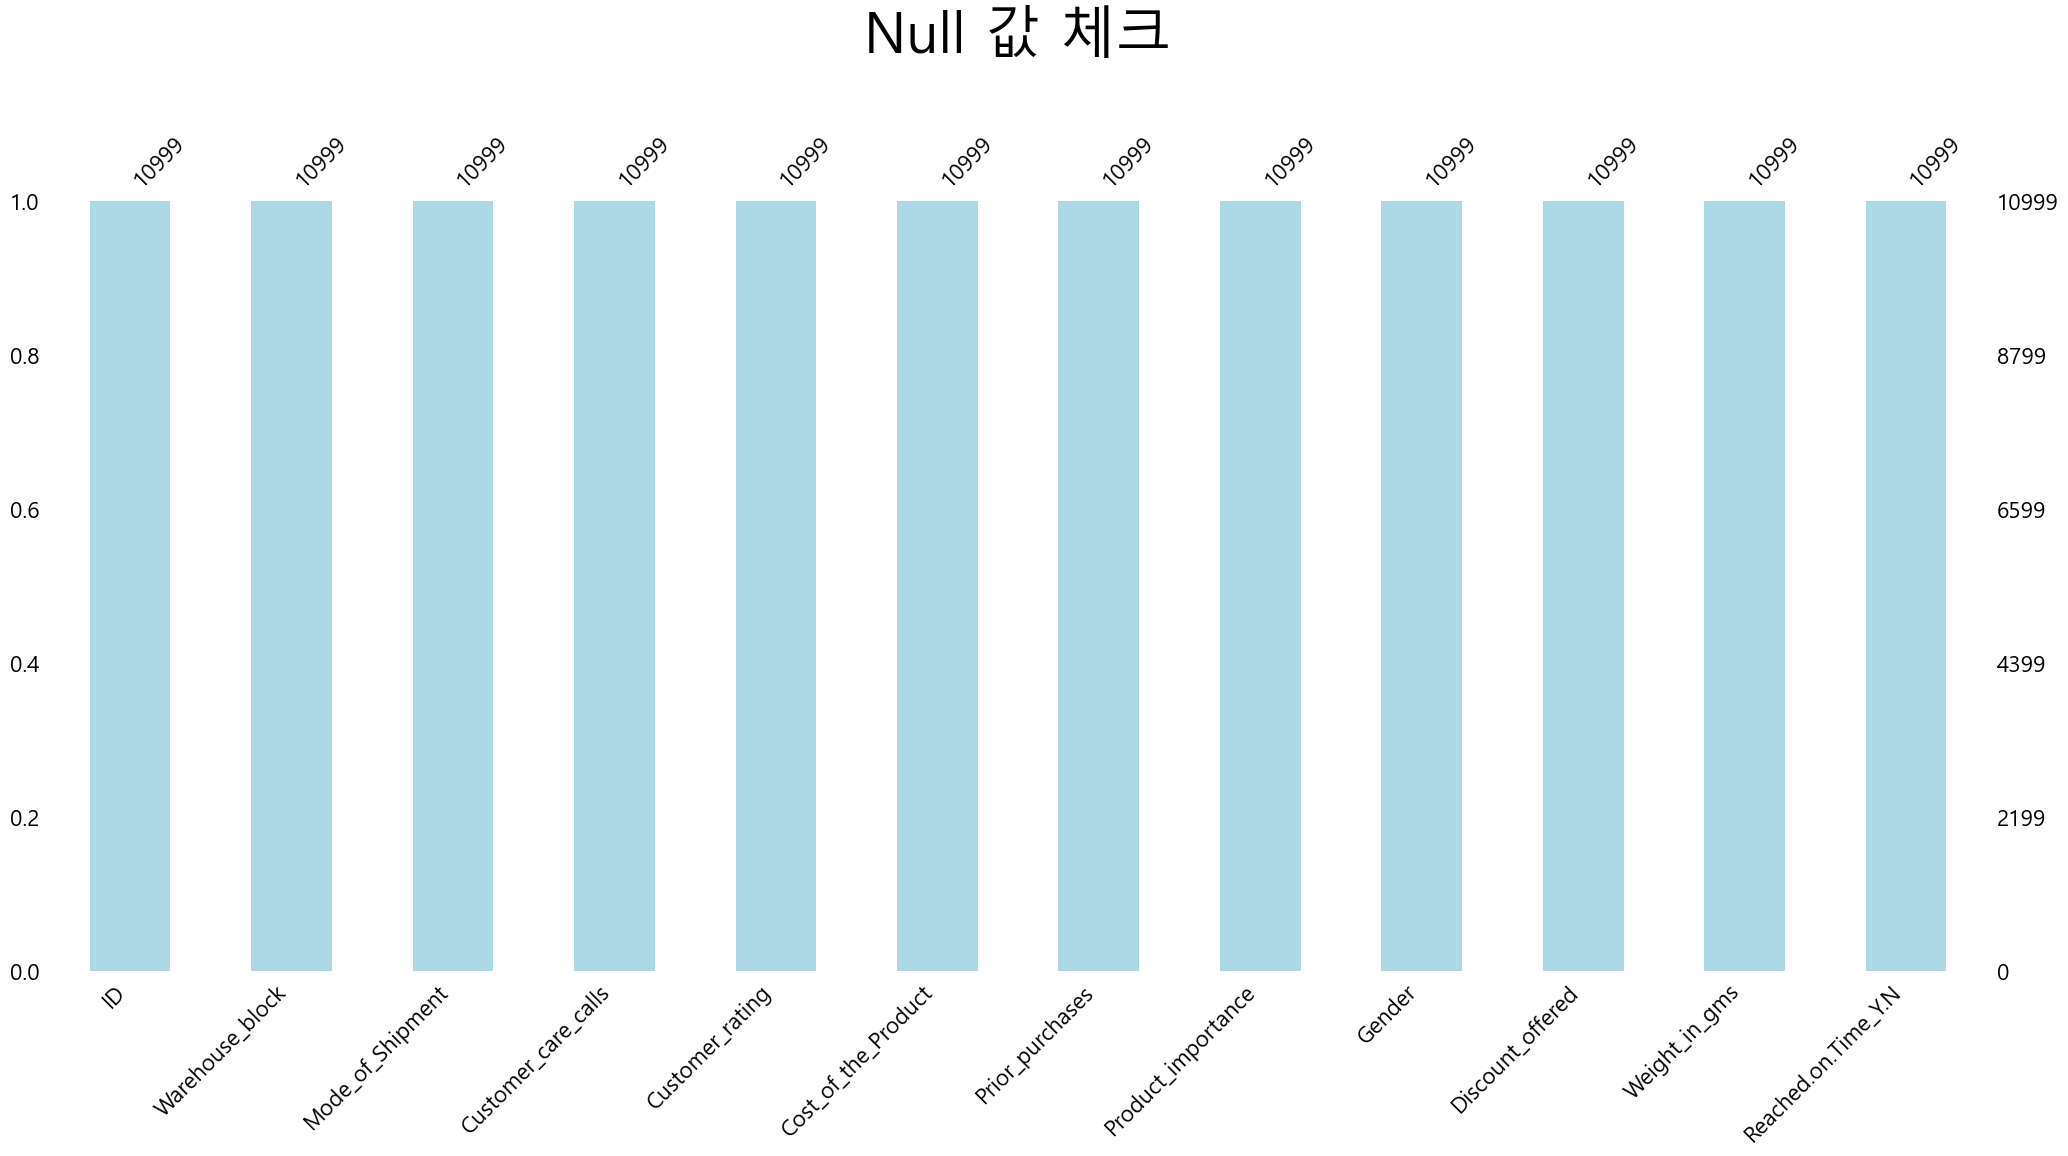

In [45]:
import missingno as msno
msno.bar(df, color = 'lightblue')
plt.title('Null 값 체크\n', fontsize = 40)
plt.show()

#### 그래프 분석

* 모든 컬럼이 10999개의 값을 가지고 있음

* Null 값 미존재 확인함

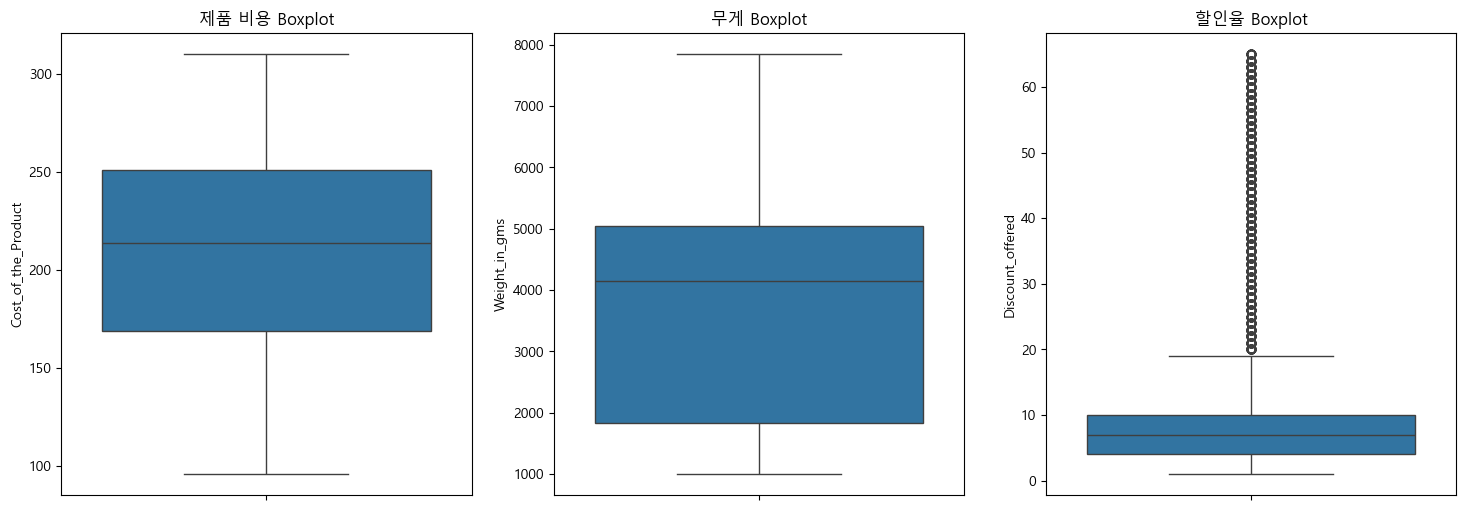

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(y='Cost_of_the_Product', data=df, ax=axes[0])
axes[0].set_title('제품 비용 Boxplot')
sns.boxplot(y='Weight_in_gms', data=df, ax=axes[1])
axes[1].set_title('무게 Boxplot')
sns.boxplot(y='Discount_offered', data=df, ax=axes[2])
axes[2].set_title('할인율 Boxplot')
plt.show()

#### 그래프 분석

* 비용, 무게에 이상치 미존재

* 할인율에 이상치 존재함으로 나오지만, 이는 데이터의 특성임으로 실질적인 이상치로 볼 수 없음 (히스토그램으로 확인)

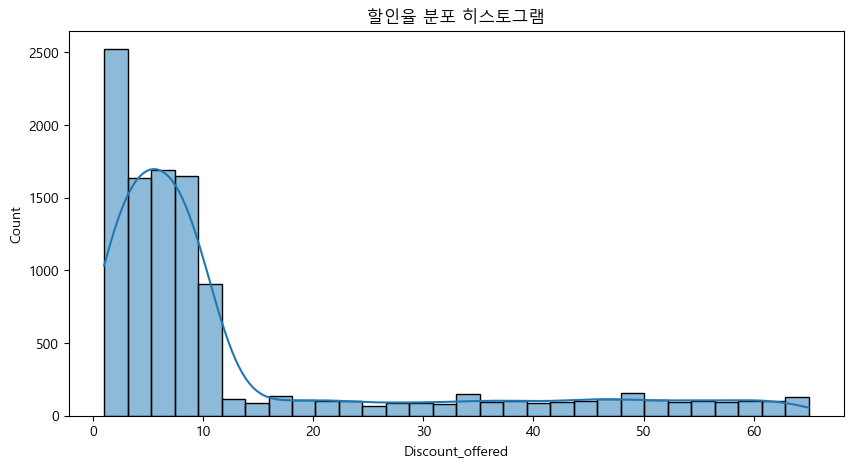

In [58]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Discount_offered'], bins=30, kde=True)
plt.title('할인율 분포 히스토그램')
plt.show()

* 할인율이 낮은 데이터가 많기 때문에 할인율이 높은 데이터가 박스플롯에서 이상치로 잡힘

## 1. 개별 변수 분석 (Univariate Analysis)

각 변수가 어떤 분포를 가지고 있는지 확인합니다.

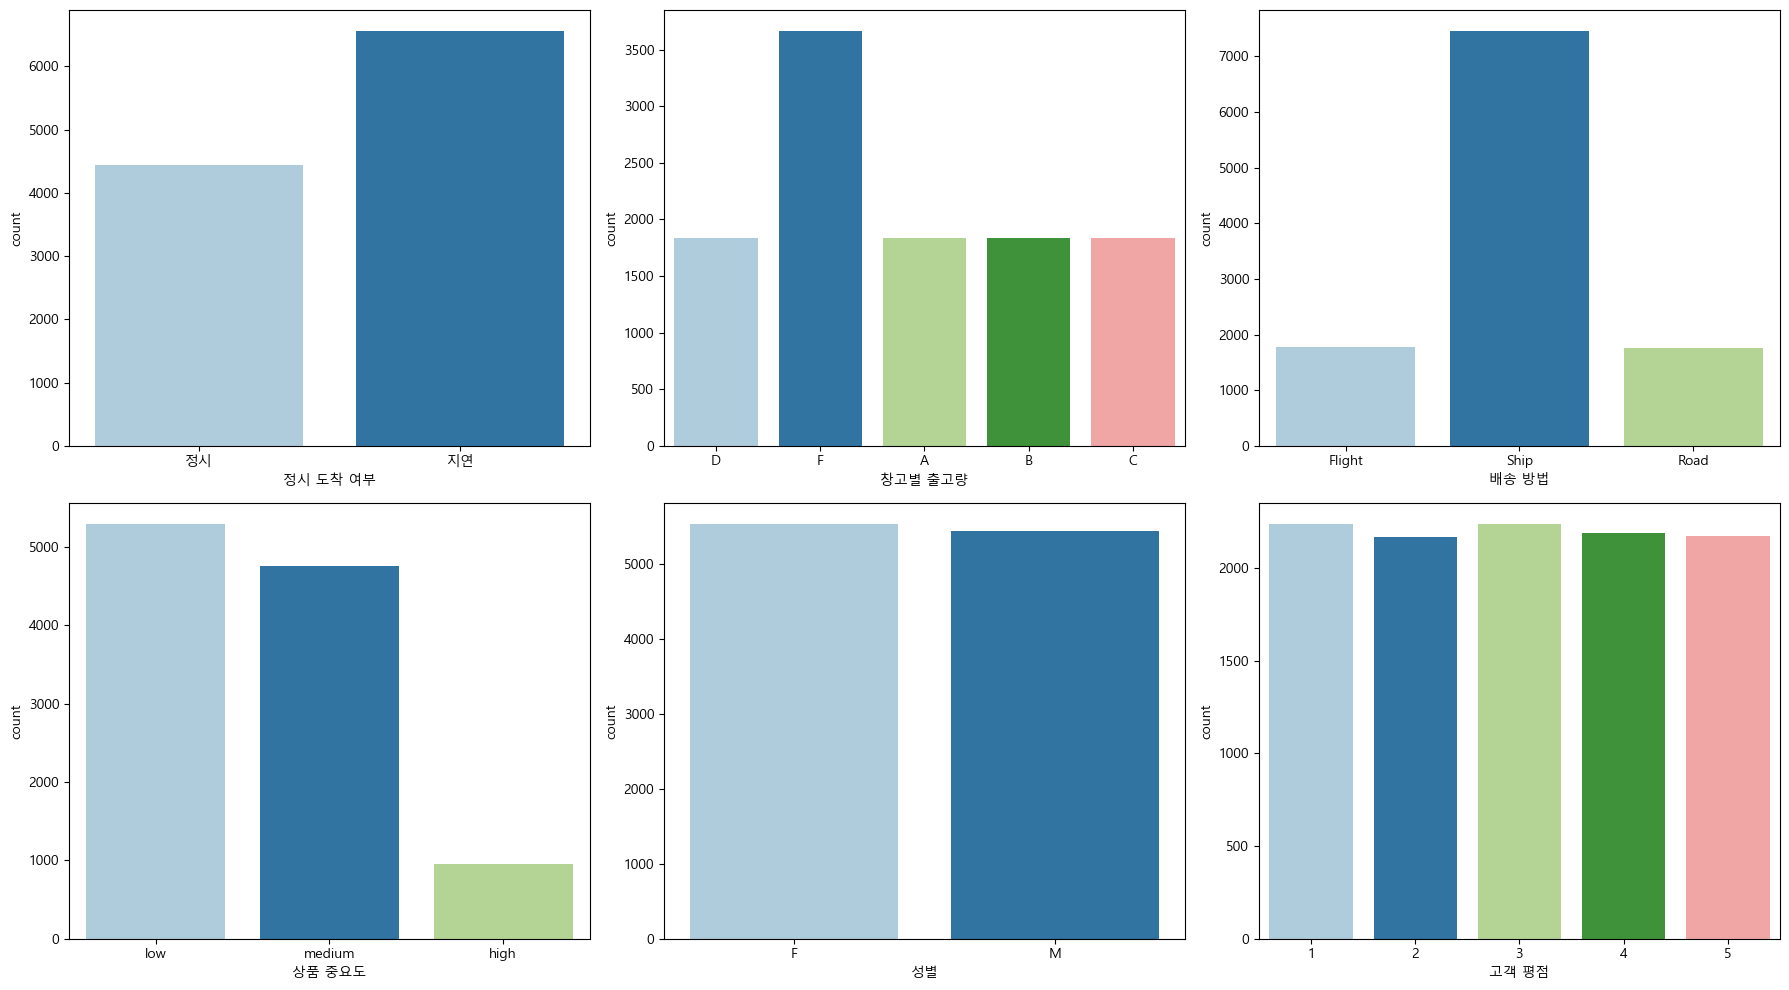

In [56]:
# 타겟 변수 및 주요 범주형 변수 분포
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.countplot(x='Reached.on.Time_Y.N', data=df, ax=axes[0, 0], palette='Paired')
sns.countplot(x='Warehouse_block', data=df, ax=axes[0, 1], palette='Paired')
sns.countplot(x='Mode_of_Shipment', data=df, ax=axes[0, 2], palette='Paired')
sns.countplot(x='Product_importance', data=df, ax=axes[1, 0], palette='Paired')
sns.countplot(x='Gender', data=df, ax=axes[1, 1], palette='Paired')
sns.countplot(x='Customer_rating', data=df, ax=axes[1, 2], palette='Paired')

axes[0, 0].set_xlabel('정시 도착 여부')
axes[0, 1].set_xlabel('창고별 출고량')
axes[0, 2].set_xlabel('배송 방법')
axes[1, 0].set_xlabel('상품 중요도')
axes[1, 1].set_xlabel('성별')
axes[1, 2].set_xlabel('고객 평점')

axes[0, 0].set_xticklabels(['정시', '지연'])

plt.tight_layout()
plt.show()

#### 그래프 분석

* Reached.on.Time_Y.N : 지연 도착 수가 정시 도착에 비해 많음

* Warehouse_block : F 창고의 물량이 가장 많음

* Mode_of_Shipment : Ship이 가장 많음

* Product_importance : 제품 중요도가 low 이거나 medium인 상품의 수가 많음

* Gender : 여성의 수가 남성의 수보다 많으나, 크게 차이가 없음

* Customer_rating : 평점의 분포가 고르게 이루어져 있음

## 2. 지연 여부와의 관계 분석 (Bivariate Analysis)

단일 변수와 지연 여부 사이의 관계를 시각화합니다.

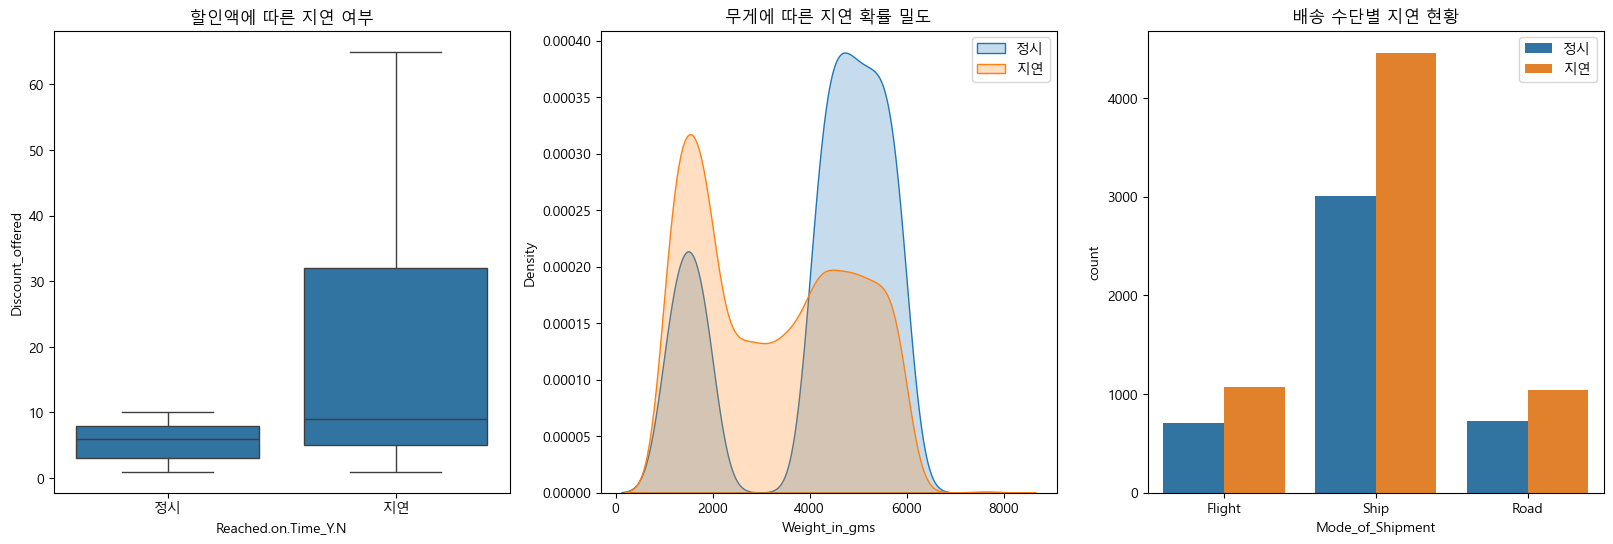

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 할인액 vs 지연
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df, ax=axes[0])
axes[0].set_title('할인액에 따른 지연 여부')
axes[0].set_xticklabels(['정시', '지연'])

# 무게 vs 지연
sns.kdeplot(df[df['Reached.on.Time_Y.N']==0]['Weight_in_gms'], label='정시', fill=True, ax=axes[1])
sns.kdeplot(df[df['Reached.on.Time_Y.N']==1]['Weight_in_gms'], label='지연', fill=True, ax=axes[1])
axes[1].set_title('무게에 따른 지연 확률 밀도')
axes[1].legend()

# 배송 수단 vs 지연
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df, ax=axes[2])
axes[2].set_title('배송 수단별 지연 현황')
axes[2].legend(['정시', '지연'])

plt.show()

#### 그래프 분석

* 할인액 + 지연 : 할인율이 10%를 넘어가면 지연 배송됨

* 무게 + 지연 : 저중량(~3000)구간과 중중량(3000~6000)구간에서 지연 배송률이 높음

* 배송 수단 + 지연 : 모든 수단에서 지연 배송률이 높으나, Ship에서 지연률이 가장 높음

## 3. 수치형 변수 간 상관관계 분석 (Correlation Analysis)

어떤 변수들이 서로 밀접하게 연관되어 있는지 히트맵으로 확인합니다.

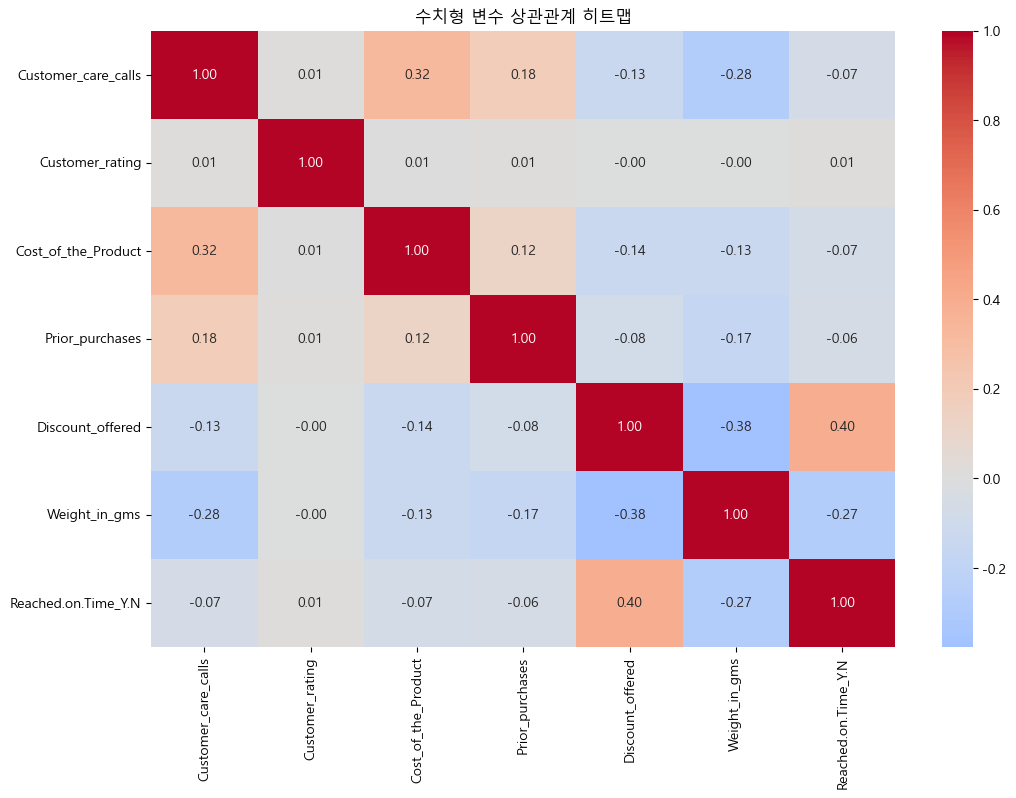

In [47]:
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix.drop('ID', axis=1).drop('ID', axis=0), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('수치형 변수 상관관계 히트맵')
plt.show()

#### 그래프 분석

* 고객 전화수, 고객 평점, 물품 가격, 이전 주문 회수는 지연 배송 여부에 **영향이 적음 (0.01 ~ 0.07)**

* 할인 제공은 지연 배송 여부와 **높은 양의 상관관계(+40%)**

* 상품의 무게는 지연 배송 여부와 **음의 상관관계(-27%)**

* 할인 제공과 상품의 무게 사이는 **음의 상관관계(-38%)**

* 문의 횟수와 상품의 무게 사이는 **음의 상관관계(-28%)**

* 문의 횟수와 상품 가격 사이는 **양의 상관관계(+32%)**

* 이전 구매 횟수와 문의 횟수 사이는 **약한 양의 상관관계(+18%)**

## 4. 범주형 변수별 지연율 비교 (Categorical Features Analysis)

범주형 변수가 정시 도착에 미치는 영향을 시각화

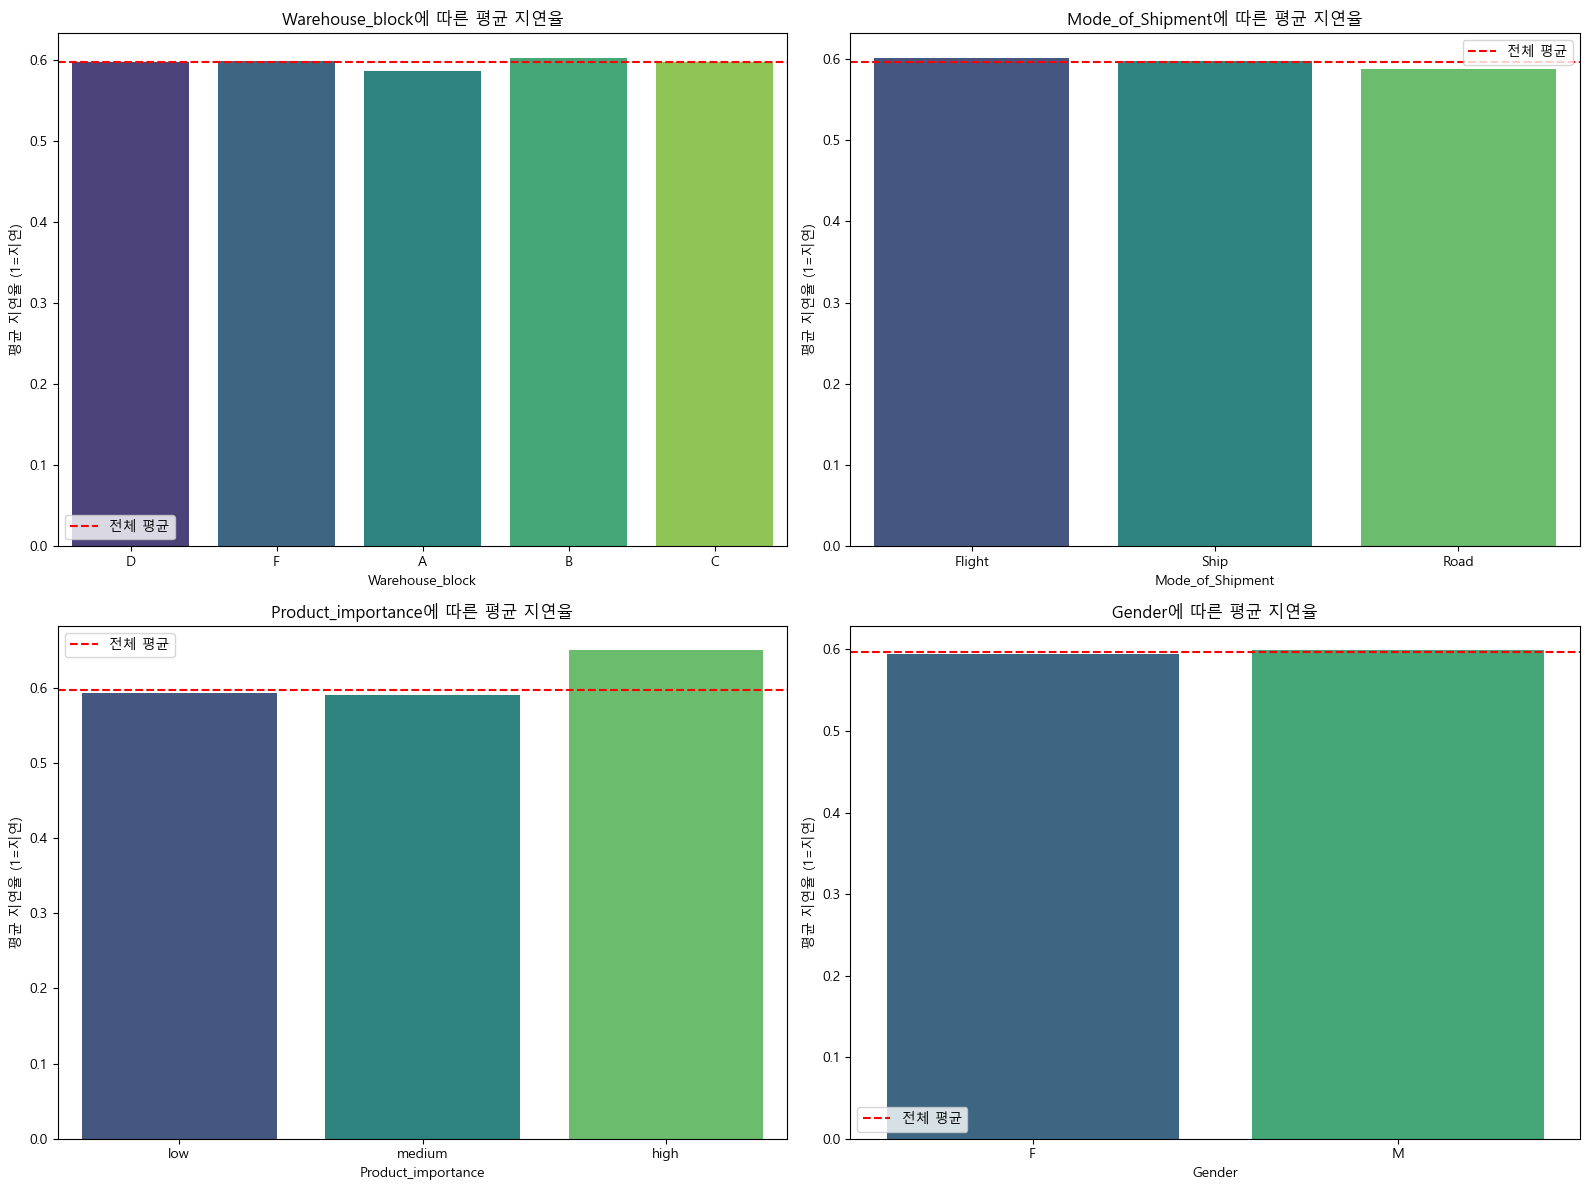

In [78]:
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
for i, col in enumerate(categorical_cols):
    row, col_idx = divmod(i, 2)
    
    # 각 범주별 Reached.on.Time_Y.N의 평균(지연율) 계산
    sns.barplot(x=col, y='Reached.on.Time_Y.N', data=df, ax=axes[row, col_idx], errorbar=None, palette='viridis')
    axes[row, col_idx].set_title(f'{col}에 따른 평균 지연율')
    axes[row, col_idx].set_ylabel('평균 지연율 (1=지연)')
    
    # 전체 평균 표시
    mean_val = df['Reached.on.Time_Y.N'].mean()
    axes[row, col_idx].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
    axes[row, col_idx].legend()
plt.tight_layout()
plt.show()

#### 그래프 분석

 * 대부분의 항목이 평균 지연율에 근접

 * 상품 중요도가 높음 일 때 평균 이상의 지연이 발생

   * 가치가 높은 상품 배송시 지연될 확률이 높음

## 5. 다변량 분석: 변수 간의 상호작용 (Multivariate Analysis)

배송 수단, 무게, 지연 여부의 복합적인 관계를 분석합니다.

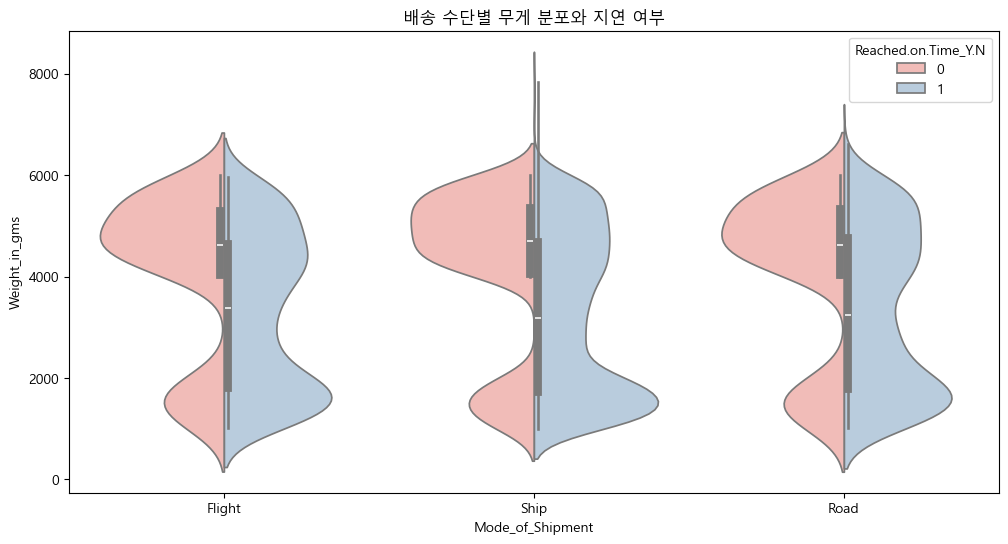

In [10]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Mode_of_Shipment', y='Weight_in_gms', hue='Reached.on.Time_Y.N', 
               data=df, split=True, palette='Pastel1')
plt.title('배송 수단별 무게 분포와 지연 여부')
plt.show()

#### 그래프 분석

* 배송 수단간의 그래프 모양이 비슷함 = 배송 수단과 지연 여부에 관계가 적음

* Ship + 낮은 무게에서의 지연 배송 그래프가 조금 더 뾰족함 = 저중량 + Ship 일 때 지연 배송률이 높다고 볼 수 있음

  * 그러나 이전 분석에서 Ship의 데이터 수가 많았기 때문에 단순 데이터 양의 차이로 인한 부분으로 해석됨

상품 비용, 무게, 지연여부의 관계를 분석

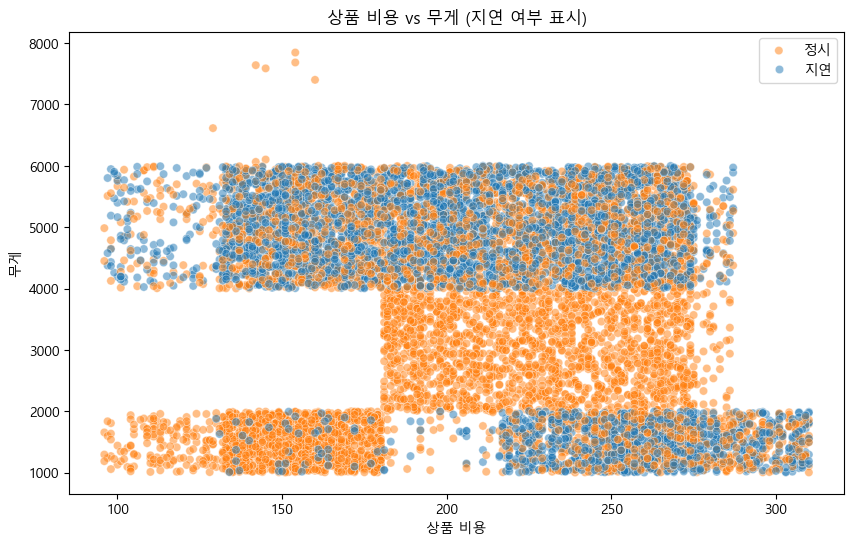

In [75]:
plt.figure(figsize=(10, 6))
costVsWei = sns.scatterplot(x='Cost_of_the_Product', y='Weight_in_gms', hue='Reached.on.Time_Y.N', data=df, alpha=0.5)
costVsWei.legend(['정시', '지연'])
costVsWei.set_xlabel('상품 비용')
costVsWei.set_ylabel('무게')
plt.title('상품 비용 vs 무게 (지연 여부 표시)')
plt.show()

#### 그래프 분석

 * 상품 무게가 특정 구간일 경우에만 지연이 발생함

 * 상품 가격은 지연 여부에 영향을 주지 않음

## 6. 고객 행동 및 만족도 분석 (Customer Behavior Analysis)

문의 전화 횟수와 평점이 지연 여부와 관련이 있는지 확인합니다.

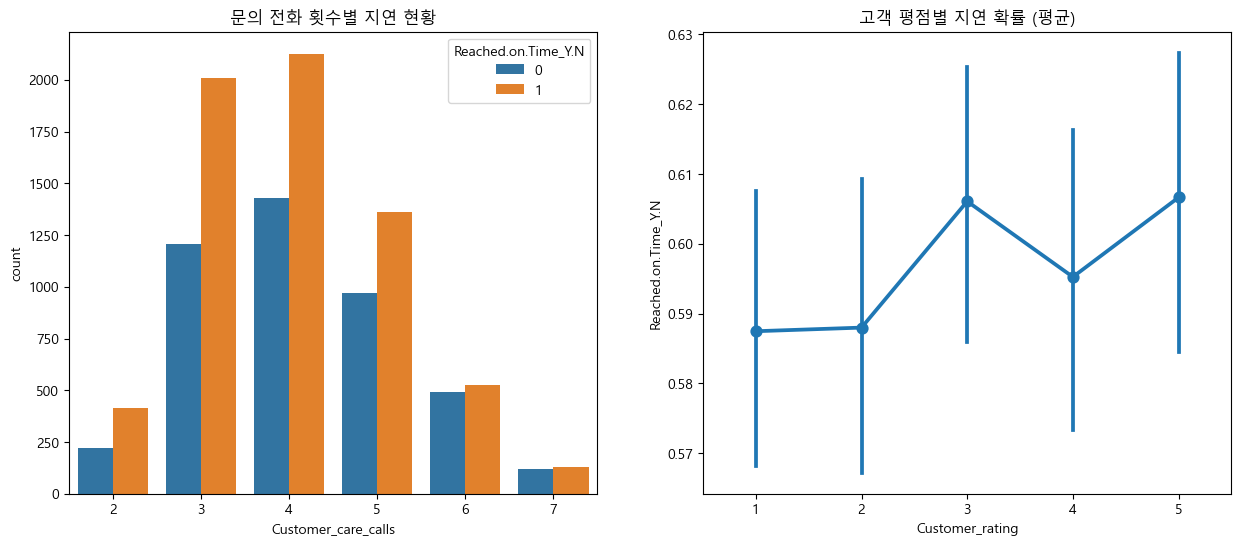

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 문의 전화 횟수별 지연율
sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=df, ax=axes[0])
axes[0].set_title('문의 전화 횟수별 지연 현황')

# 고객 평점별 지연율
sns.pointplot(x='Customer_rating', y='Reached.on.Time_Y.N', data=df, ax=axes[1])
axes[1].set_title('고객 평점별 지연 확률 (평균)')

plt.show()

#### 그래프 분석

1. 문의 횟수별 지연
 * 문의 횟수가 3, 4회일 때 지연률이 가장 높음
 * 문의 횟수가 7회일때 지연률이 가장 낮음
 * 앞선 히트맵 그래프에서 문의 회수와 지연률의 상관관계가 낮은 것으로 나왔기 때문에 인과관계에 의한 그래프로 보여짐
 * 지연이 발생함(원인)으로 인한 문의 전화(결과)일 가능성 높음

2. 평점별 지연
 * 모든 항목에 대한 평균값의 위치가 비슷함
 * 모든 항목의 선 길이가 비슷함
 * 히트맵에서 확인한 것과 일치 (상관관계 적음)

## 7. 구간화(Binning)를 통한 패턴 강화

무게 데이터를 구간별로 나누어 지연율의 변화를 극명하게 봅니다.

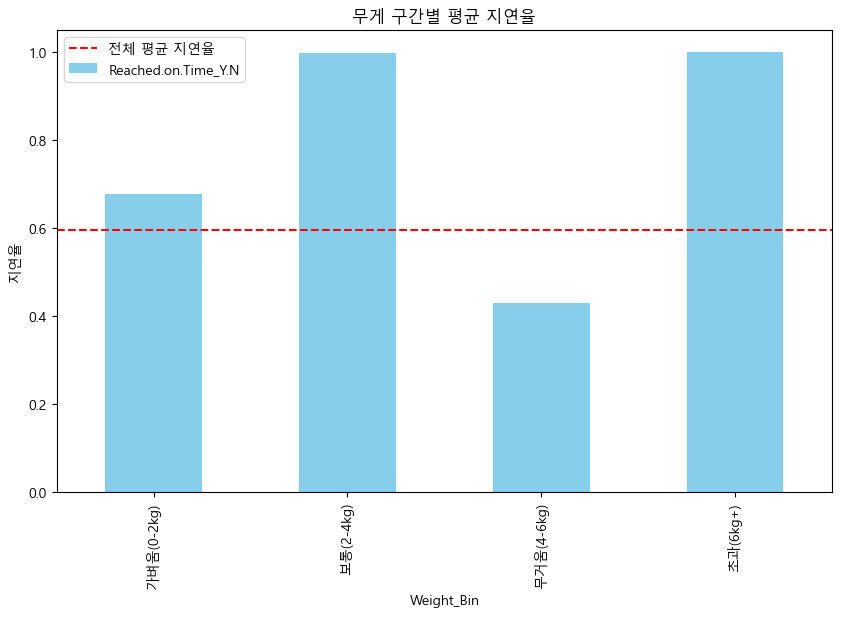

In [12]:
# 무게 구간화 (Binning)
df['Weight_Bin'] = pd.cut(df['Weight_in_gms'], bins=[0, 2000, 4000, 6000, 10000], 
                         labels=['가벼움(0-2kg)', '보통(2-4kg)', '무거움(4-6kg)', '초과(6kg+)'])

plt.figure(figsize=(10, 6))
weight_delay_rate = df.groupby('Weight_Bin')['Reached.on.Time_Y.N'].mean()
weight_delay_rate.plot(kind='bar', color='skyblue')
plt.axhline(df['Reached.on.Time_Y.N'].mean(), color='red', linestyle='--', label='전체 평균 지연율')
plt.title('무게 구간별 평균 지연율')
plt.ylabel('지연율')
plt.legend()
plt.show()

#### 그래프 분석

* 상품의 무게가 보통, 초과 일 때 지연율이 높음

* 상품의 무게가 무거움 일 때 지연율이 낮음

## 8. 심화 분석 결론

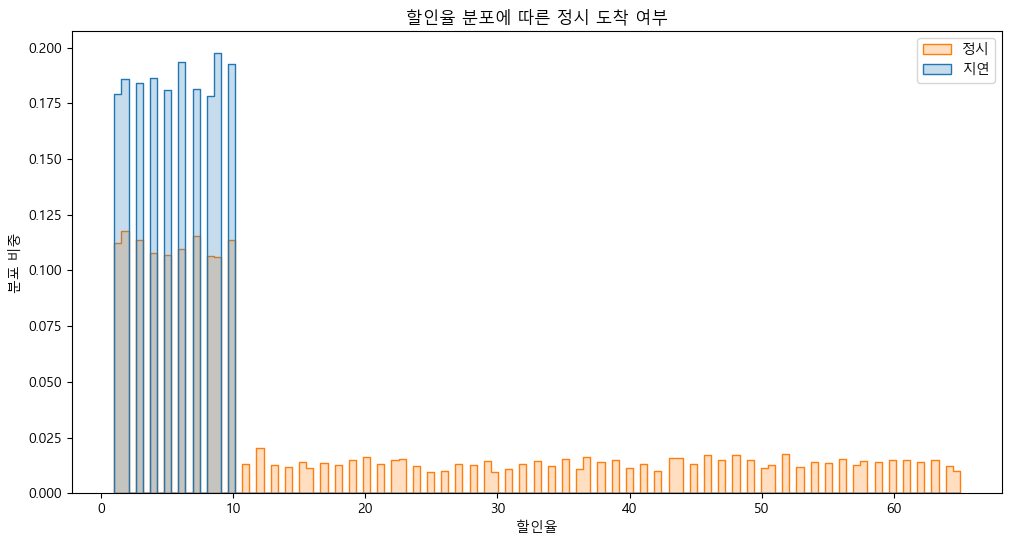

In [70]:
plt.figure(figsize=(12, 6))
dcRot = sns.histplot(data=df, x='Discount_offered', hue='Reached.on.Time_Y.N', element='step',
             stat='density', common_norm=False)
dcRot.legend(['정시', '지연'])
dcRot.set_xlabel('할인율')
dcRot.set_ylabel('분포 비중')
plt.title('할인율 분포에 따른 정시 도착 여부')
plt.show()

1. **핵심 인자** : `Discount_offered (할인율)`는 지연 여부와 가장 강력한 상관관계를 가짐. (10% 이상시 지연율이 현저히 높음)

2. **무게** : 4kg ~ 6kg 사이의 상품은 지연율이 현저히 낮음. 이 구간의 물류 프로세스가 가장 효율적.

3. **가치** : 상품 가치가 높을 때(high) 지연율이 평균 이상으로 높음.

4. **고객 피드백** : 문의 전화 횟수가 2 ~ 3회일 때 지연 확률이 높으나, 평점과의 직접적인 상관관계는 예상보다 낮음.

#### 할인이 적용되는 상품의 주문량이 많아지고, 그로인해 배송 물량이 많아지면서 지연이 발생하는 것으로 추측

#### 고가치 상품의 경우 배송 중 파손을 방지하기 위해 배송이 지연되는 것으로 추측.

<br>
<br>

---

<br>
<br>

## ***9. 가설 설정***

#### 1. 할인율(Discount_offered)이 배송 지연의 핵심 지표일 것
 * 일반적으로 할인율이 높은 상품은 재고 처리 물품이거나 프로모션 상품일 가능성
 * 배송 우선순위가 낮을 수 있거나, 반대로 특정 할인 구간에서만 배송 패턴이 다를 수 있다.
 * 할인율이 없거나 낮은 상품의 지연 발생 이유 및 원인 파악 필요


#### 2. 상품 무게(Weight_in_gms)에 따라 배송 모드와 지연 위험이 달라질 것
 * 무게는 배송 수단(항공, 선박, 육로) 결정에 영향을 미침
 * 무거운 물건일수록 물류 처리 시간이 길어질 가능성


#### 3. 고객 문의(Customer_care_calls)가 많을수록 이미 배송이 지연되고 있을 확률
 * 배송이 늦어지면 고객이 초조해하여 전화를 더 많이 할 수 있다.
 * 전화 횟수 = 지연의 결과 => 예측 변수가 될 수 있다.


#### 4. 상품 중요도(Product_importance)에 따라 배송 처리 우선순위가 다를 것
 * high 중요도를 가진 상품(가치가 높은 상품)은 더 신경 써서 배송할 가능성
 * 평균 지연율이 높은 근거가 될 수 있다.


#### 5. 상품 가격 대비 무게(Cost_of_the_Product / Weight_in_gms)가 배송 효율성을 나타낼 수 있다.
 * 가볍지만 비싼 상품(고부가가치)은 항공편 등 빠른 배송을 이용할 가능성이 높음
 * 무겁고 싼 물건은 선박을 이용할 가능성이 높음